<a href="https://colab.research.google.com/github/joegui2001/Story/blob/main/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('sample_data/mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

In [ ]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df_data.isna().values.any()

True

In [ ]:
df_data.duplicated().value_counts()

False    4324
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
df_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [ ]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [ ]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [ ]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
launches_per_company = df_data.groupby('Organisation').agg({'Mission_Status': pd.Series.count})
launches_per_company.sort_values(by='Mission_Status', ascending=False, inplace=True)
launches_per_company.head()

,Mission_Status
Organisation,
RVSN USSR,1777
Arianespace,279
General Dynamics,251
CASC,251
NASA,203


In [ ]:
bar = px.bar(data_frame=launches_per_company, x=launches_per_company.index, y=launches_per_company.Mission_Status, title='Launches Per Company')
bar.update_layout(yaxis_title='Launches', xaxis_title='Organization')

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
df_data['Rocket_Status'].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
df_data['Mission_Status'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
x = df_data.dropna()

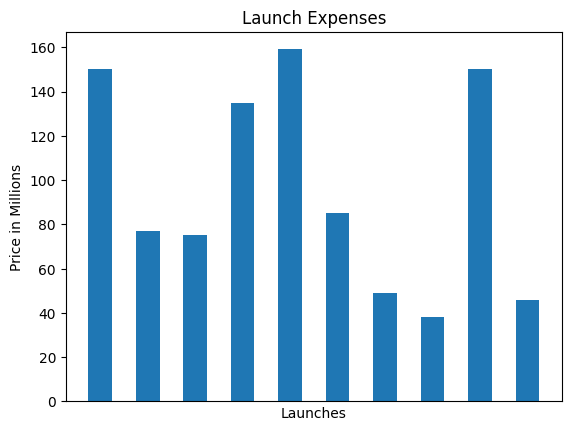

In [ ]:
plt.hist(x=x['Price'], rwidth=.5, bins=10)
plt.title('Launch Expenses')
plt.ylabel('Price in Millions')
plt.xlabel('Launches')
plt.xticks(ticks=[])
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
df_data['Country'] = df_data['Location'].str.split(', ').str[-1]
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [ ]:
df_data['Country'].replace({'Pacific Ocean': 'USA', 'Russia': 'Russian Federation', 'New Mexico': 'USA', 'Yellow Sea': 'China', 'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
'Pacific Missile Range Facility': 'USA', 'Barents Sea': 'Russian Federation', 'Gran Canaria': 'USA', 'Iran': 'Iran, Islamic Republic of', 'North Korea': "Korea, Democratic People's Republic of", 'South Korea': "Korea, Republic of"}, inplace=True)
df_data['Country'].value_counts()

Russian Federation                        1398
USA                                       1387
Kazakhstan                                 701
France                                     303
China                                      269
Japan                                      126
India                                       76
Iran, Islamic Republic of                   14
New Zealand                                 13
Israel                                      11
Kenya                                        9
Australia                                    6
Korea, Democratic People's Republic of       5
Korea, Republic of                           3
Brazil                                       3
Name: Country, dtype: int64

In [ ]:
for country in df_data['Country']:
  iso = countries.get(country)
  df_data['Country'].replace({country: iso.alpha3}, inplace=True)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [ ]:
x = df_data.groupby('Country', as_index=False).agg({'Mission_Status':pd.Series.count})
x.sort_values('Mission_Status', ascending=False, inplace=True)
px.choropleth(data_frame=x, locations=x.Country, locationmode='ISO-3', color_continuous_scale='matter', color=x.Mission_Status)

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
x = df_data[df_data['Mission_Status'] == 'Failure']
y = x.groupby('Country').size()
df = y.reset_index(name='Failures')

In [ ]:
px.choropleth(data_frame=df, locationmode='ISO-3', locations='Country', color_continuous_scale='matter', color='Failures')

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
px.sunburst(df_data, path=['Country', 'Organisation', 'Mission_Status'], hover_name='Country')

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
df_df = df_data.dropna()

In [ ]:
df_df['Price'] = pd.to_numeric(df_df['Price'], errors='coerce')

<ipython-input-118-2d36be759e53>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
xxx = df_df.groupby('Organisation').agg({'Price': pd.Series.sum})
xxx.sort_values('Price', ascending=False, inplace=True)
xxx.head(3)

,Price
Organisation,
NASA,"61,200.00"
Arianespace,"16,345.00"
ULA,"14,798.00"


# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
z = df_df.groupby('Organisation').agg({'Price': pd.Series.sum})
z.reset_index(inplace=True)
z.head(3)

,Organisation,Price
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,340.26"


In [ ]:
yyy = df_df.groupby('Organisation').agg({'Mission_Status': pd.Series.count})
yyy.reset_index(inplace=True)
z['MSPL'] = z['Price'] / yyy['Mission_Status']


In [ ]:
z

,Organisation,Price,MSPL
0,Arianespace,"16,345.00",170.26
1,Boeing,"1,241.00",177.29
2,CASC,"6,340.26",40.13
3,EER,20.00,20.00
4,ESA,37.00,37.00
5,Eurockot,543.40,41.80
6,ExPace,28.30,28.30
7,ILS,"1,320.00",101.54
8,ISRO,"2,177.00",32.49
9,JAXA,168.00,56.00


# Chart the Number of Launches per Year

Text(0.5, 1.0, 'Launches Per Year')

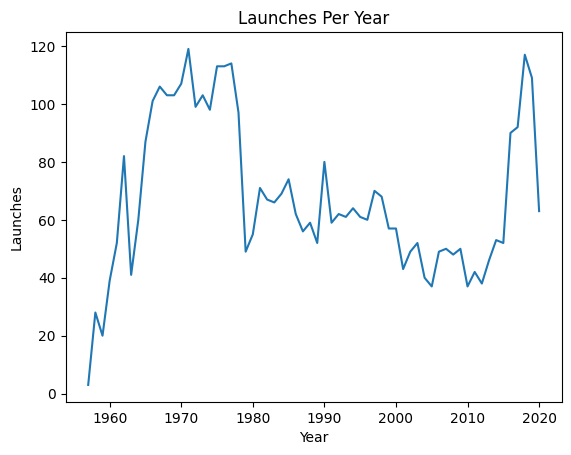

In [ ]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce', utc=True)
launches_per_year = df_data.groupby(df_data['Date'].dt.year).size()
plt.plot(launches_per_year)
plt.xlabel('Year')
plt.ylabel('Launches')
plt.title('Launches Per Year')

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
launches_month_month = df_data.groupby(df_data['Date'].dt.month).size().reset_index(name='Launches')
launches_month_month['Rolling'] = launches_month_month['Launches'].rolling(2).mean()
launches_month_month.dropna(inplace=True)

<Axes: title={'center': 'Number of Launches Month on Month'}, xlabel='Month', ylabel='Launches'>

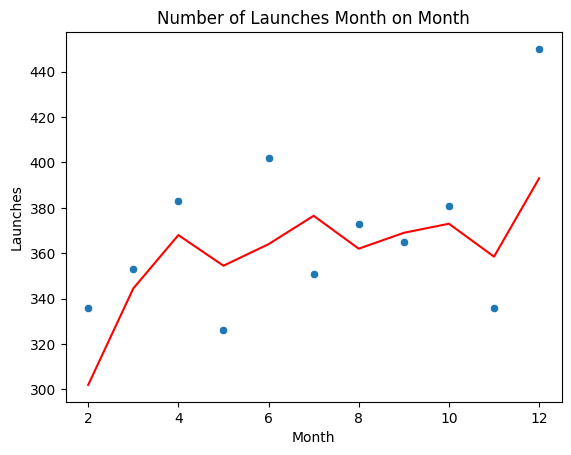

In [ ]:
sns.scatterplot(data=launches_month_month, x='Date', y='Launches')
plt.title('Number of Launches Month on Month')
plt.xlabel('Month')
plt.ylabel('Launches')
sns.lineplot(data=launches_month_month, x='Date', y='Rolling', color='red')

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
sss = df_data.groupby(df_data['Date'].dt.month).size()
sss

Date
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
dtype: int64

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
clean_df = df_data.dropna()
clean_df['Price'] = pd.to_numeric(clean_df['Price'], errors='coerce')

<ipython-input-28-17fa898576e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Price'] = pd.to_numeric(clean_df['Price'], errors='coerce')


Text(0, 0.5, 'Launch Price in Millions')

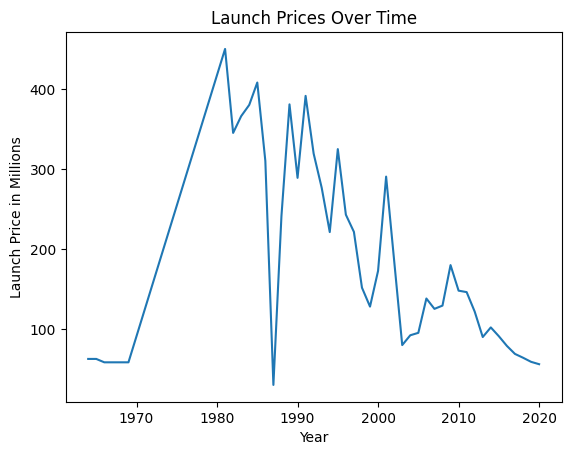

In [ ]:
qqq = clean_df.groupby(clean_df['Date'].dt.year).agg({'Price': pd.Series.mean})
qqq.dropna(inplace=True)
plt.plot(qqq.index, qqq.values)
plt.title('Launch Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Launch Price in Millions')

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
launches_top_10_org = df_data.groupby(['Organisation', df_data['Date'].dt.year]).size().reset_index(name='Launches')
top_10_org = launches_top_10_org.groupby('Organisation')['Launches'].sum().sort_values(ascending=False).head(10).reset_index()
launches_top_10_org = launches_top_10_org.merge(top_10_org['Organisation'], on='Organisation', how='inner')
launches_top_10_org

,Organisation,Date,Launches
0,Arianespace,1984,3
1,Arianespace,1985,4
2,Arianespace,1986,3
3,Arianespace,1987,2
4,Arianespace,1988,6
...,...,...,...
318,VKS RF,2016,4
319,VKS RF,2017,6
320,VKS RF,2018,5
321,VKS RF,2019,8


In [ ]:
bar = px.bar(data_frame=launches_top_10_org, x='Date', y='Launches', color='Organisation')
bar.update_layout(title='Launches Over Time By Top 10 Organizations')

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
cold_war = df_data.loc[df_data['Date'].dt.year <= 1991]

In [ ]:
cold_war_launches = cold_war.groupby([cold_war['Date'].dt.year, 'Country']).size().reset_index(name='Launches')
cold_war_launches

,Date,Country,Launches
0,1957,KAZ,2
1,1957,USA,1
2,1958,KAZ,5
3,1958,USA,23
4,1959,KAZ,4
...,...,...,...
182,1991,FRA,8
183,1991,JPN,3
184,1991,KAZ,4
185,1991,RUS,25


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
aaa = cold_war_launches.loc[(cold_war_launches['Country'] == 'RUS') | (cold_war_launches['Country'] == 'USA')]
aaa

,Date,Country,Launches
1,1957,USA,1
3,1958,USA,23
5,1959,USA,16
7,1960,USA,30
9,1961,RUS,2
...,...,...,...
173,1989,USA,16
179,1990,RUS,30
180,1990,USA,26
185,1991,RUS,25


In [ ]:
px.pie(data_frame=aaa, names='Country', values='Launches', title='USSR LAUNCHES vs USA LAUNCHES')

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
bar = px.bar(data_frame=aaa, x='Date', y='Launches', color='Country', barmode='group')
bar.update_layout(title='Total Number of Launches Year on Year, USA vs USSR')

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
g = df_data.loc[df_data['Mission_Status'] == 'Failure']
g = g.groupby(df_data['Date'].dt.year).size().reset_index(name='Mission_Fails')
g

,Date,Mission_Fails
0,1957,1
1,1958,20
2,1959,9
3,1960,20
4,1961,17
...,...,...
59,2016,2
60,2017,6
61,2018,2
62,2019,6


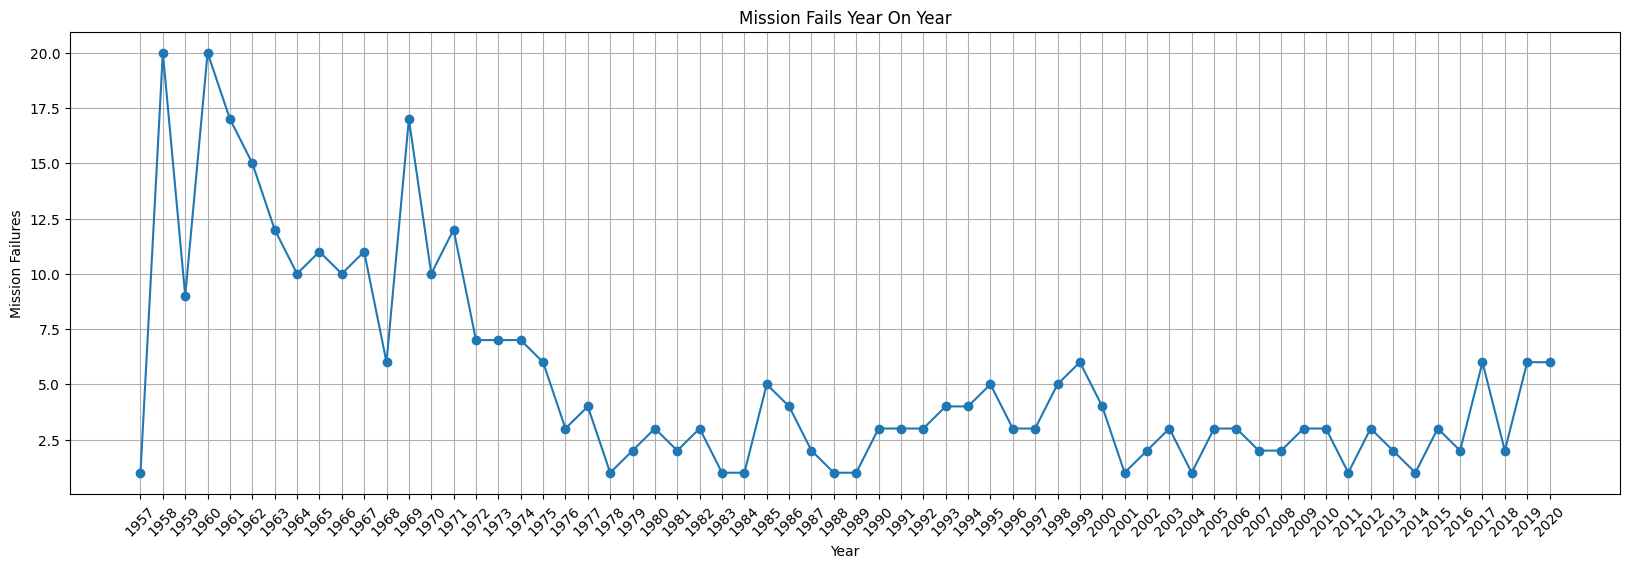

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(g.Date, g.Mission_Fails, marker='o', linestyle='-')
plt.title('Mission Fails Year On Year')
plt.xlabel('Year')
plt.ylabel('Mission Failures')
plt.xticks(g.Date, rotation=45)
plt.grid(True)

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
bbb = df_data.loc[df_data['Mission_Status'] == 'Success']
bbb = bbb.groupby(df_data['Date'].dt.year).size().reset_index(name='Success_Launches')
s = g.merge(bbb, on='Date', how='inner')
s['Fail_Percentage'] = s.Mission_Fails / s.Success_Launches
s

,Date,Mission_Fails,Success_Launches,Fail_Percentage
0,1957,1,2,0.50
1,1958,20,6,3.33
2,1959,9,8,1.12
3,1960,20,19,1.05
4,1961,17,32,0.53
...,...,...,...,...
59,2016,2,86,0.02
60,2017,6,84,0.07
61,2018,2,113,0.02
62,2019,6,100,0.06


Text(0, 0.5, 'Percent Of Failures Over Time in %')

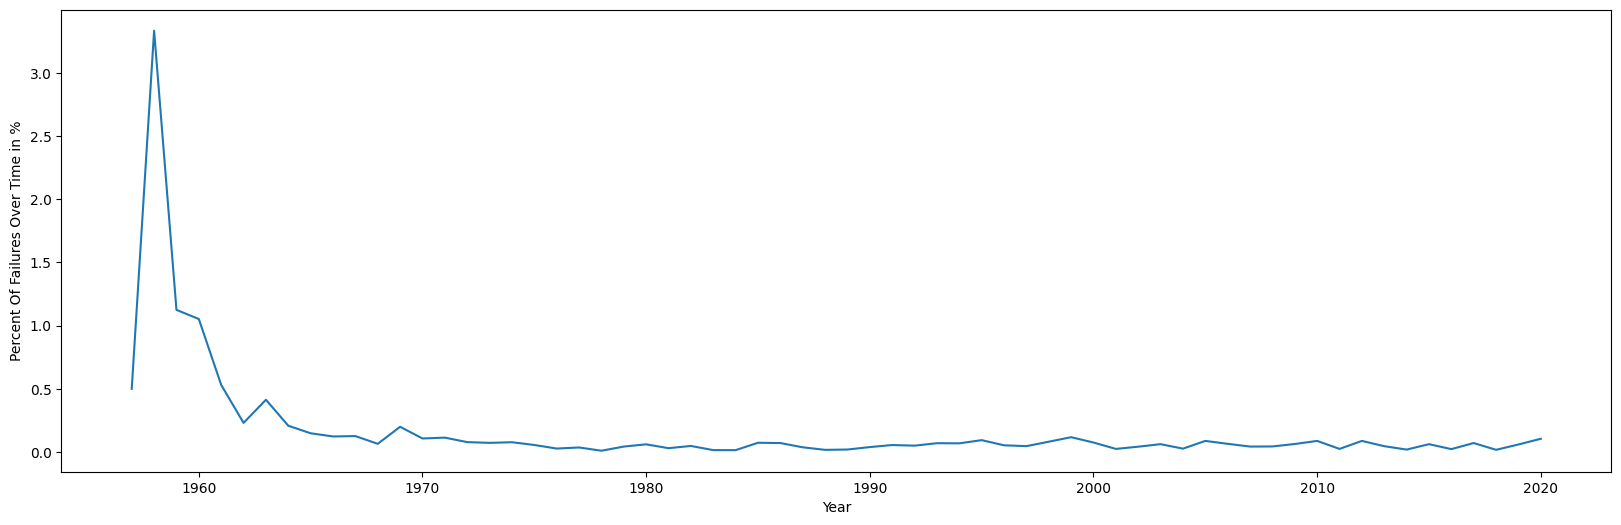

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(s.Date, s.Fail_Percentage)
plt.xlabel('Year')
plt.ylabel('Percent Of Failures Over Time in %')

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
bb = df_data.groupby([df_data['Date'].dt.year, 'Country', 'Mission_Status']).size().reset_index(name='Launches')
bbb = bb.loc[bb.groupby('Date')['Launches'].idxmax()]
bbb

,Date,Country,Mission_Status,Launches
0,1957,KAZ,Success,2
4,1958,USA,Failure,16
10,1959,USA,Failure,8
16,1960,USA,Success,16
22,1961,USA,Success,27
...,...,...,...,...
563,2016,USA,Success,26
578,2017,USA,Success,30
580,2018,CHN,Success,38
592,2019,CHN,Success,32


In [ ]:
px.bar(data_frame=bbb, x='Date', y='Launches', barmode='group', color='Country', title='Lead Country in Total Launches By Year ')

In [ ]:
j = bbb.loc[bbb['Mission_Status'] == 'Success']
px.bar(data_frame=j, x='Date', y='Launches', color='Country', title='Lead Country in Successfull Launches By Year')

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
ooo = df_data.groupby([df_data['Date'].dt.year, 'Organisation']).size().reset_index(name='Launches')
hhh = ooo.loc[ooo.groupby('Date')['Launches'].idxmax()]
hhh

,Date,Organisation,Launches
0,1957,RVSN USSR,2
6,1958,US Navy,12
10,1959,US Air Force,10
15,1960,US Air Force,21
19,1961,US Air Force,23
...,...,...,...
583,2016,CASC,22
611,2017,SpaceX,18
616,2018,CASC,37
632,2019,CASC,27


In [ ]:
px.bar(data_frame=hhh, x='Date', y='Launches', color='Organisation', title='Most Launches By Organization By Year')